In [25]:
import numpy as np
import random as rd
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [47]:
class MLP:
    def __init__(self, entradas, neur, alfa, erroTolerado):
        self.entradas = entradas
        self.neur = neur
        self.alfa = alfa
        self.erroTolerado = erroTolerado
        self.listaCiclo = []
        self.listaErro = []
        self.v = None
        self.v0 = None
        self.w = None
        self.w0 = None

    def treinar(self, x, t, max_ciclos):
        (amostras, vsai) = np.shape(t)

        self.v = np.random.uniform(-1, 1, (self.entradas, self.neur))
        self.v0 = np.random.uniform(-1, 1, (1, self.neur))
        self.w = np.random.uniform(-0.2, 0.2, (self.neur, vsai))
        self.w0 = np.random.uniform(-0.2, 0.2, (1, vsai))

        ciclo = 0
        erroTotal = 1
        while ciclo < max_ciclos and erroTotal > self.erroTolerado:
            erroTotal = 0
            for padrao in range(amostras):
                zin_j = np.dot(x[padrao, :], self.v) + self.v0
                z_j = np.tanh(zin_j)

                yin = np.dot(z_j, self.w) + self.w0
                y = np.tanh(yin)

                erroTotal += 0.5 * np.sum((t[padrao] - y) ** 2)

                deltinha_k = (t[padrao] - y) * (1 + y) * (1 - y)
                deltaw = self.alfa * np.dot(z_j.T, deltinha_k)
                deltaw0 = self.alfa * deltinha_k

                deltinhaIn_j = np.dot(deltinha_k, self.w.T)
                deltinha_j = deltinhaIn_j * (1 + z_j) * (1 - z_j)

                deltav = self.alfa * np.dot(x[padrao].reshape(-1, 1), deltinha_j)
                deltaV0 = self.alfa * deltinha_j

                self.v += deltav
                self.v0 += deltaV0
                self.w += deltaw
                self.w0 += deltaw0

            ciclo += 1
            self.listaCiclo.append(ciclo)
            self.listaErro.append(erroTotal)

    def testar(self, x_teste, t_teste):
        (amostras, _) = np.shape(x_teste)
        erroTotal = 0
        for padrao in range(amostras):
            zin_j = np.dot(x_teste[padrao, :], self.v) + self.v0
            z_j = np.tanh(zin_j)

            yin = np.dot(z_j, self.w) + self.w0
            y = np.tanh(yin)

            erroTotal += 0.5 * np.sum((t_teste[padrao] - y) ** 2)

        erro_medio = erroTotal / amostras
        return erro_medio

In [33]:
def testar_configuracoes():
    entradas = 1
    n_amostras = 500
    x_orig = np.linspace(-1, 1, n_amostras).reshape(-1, 1)
    t_orig = (np.sin(x_orig)) * (np.sin(2 * x_orig))

    n_neuronios = [50, 100, 200]
    taxas_aprendizagem = [0.005, 0.01, 0.05]
    erros_tolerados = [0.1, 0.5, 1.0]
    max_ciclos = [1000, 2000, 5000]

    resultados = []

    x_treino, x_teste, t_treino, t_teste = train_test_split(x_orig, t_orig, test_size=0.2, random_state=42)

    for neur in n_neuronios:
        for alfa in taxas_aprendizagem:
            for erro in erros_tolerados:
                for max_ciclo in max_ciclos:
                    mlp = MLP(entradas, neur, alfa, erro)
                    mlp.treinar(x_treino, t_treino, max_ciclo)
                    erro_medio = mlp.testar(x_teste, t_teste)
                    resultados.append({
                        'Neurônios': neur,
                        'Taxa de Aprendizagem': alfa,
                        'Erro Tolerado': erro,
                        'Máximo de Ciclos': max_ciclo,
                        'Erro Médio': erro_medio
                    })

    df_resultados = pd.DataFrame(resultados)
    return df_resultados, x_treino, x_teste, t_treino, t_teste

In [34]:
def plotar_variaveis(df_resultados):
    plt.figure(figsize=(15, 10))

    # Neurônios
    plt.subplot(2, 2, 1)
    plt.scatter(df_resultados['Neurônios'], df_resultados['Erro Médio'])
    plt.title('Erro Médio vs. Neurônios')
    plt.xlabel('Neurônios')
    plt.ylabel('Erro Médio')

    # Taxa de Aprendizagem
    plt.subplot(2, 2, 2)
    plt.scatter(df_resultados['Taxa de Aprendizagem'], df_resultados['Erro Médio'])
    plt.title('Erro Médio vs. Taxa de Aprendizagem')
    plt.xlabel('Taxa de Aprendizagem')
    plt.ylabel('Erro Médio')

    # Erro Tolerado
    plt.subplot(2, 2, 3)
    plt.scatter(df_resultados['Erro Tolerado'], df_resultados['Erro Médio'])
    plt.title('Erro Médio vs. Erro Tolerado')
    plt.xlabel('Erro Tolerado')
    plt.ylabel('Erro Médio')

    # Máximo de Ciclos
    plt.subplot(2, 2, 4)
    plt.scatter(df_resultados['Máximo de Ciclos'], df_resultados['Erro Médio'])
    plt.title('Erro Médio vs. Máximo de Ciclos')
    plt.xlabel('Máximo de Ciclos')
    plt.ylabel('Erro Médio')

    plt.tight_layout()
    plt.show()

In [38]:
def plotar_variaveis(df_resultados):
    fig = go.Figure(data=[go.Scatter3d(
        x=df_resultados['Neurônios'],
        y=df_resultados['Taxa de Aprendizagem'],
        z=df_resultados['Erro Tolerado'],
        mode='markers',
        marker=dict(
            size=12,
            color=df_resultados['Erro Médio'],  # define cor com base no erro médio
            colorscale='Viridis',  # define a escala de cores
            opacity=0.8
        ),
        text=df_resultados['Erro Médio'],  # exibe o erro médio ao passar o mouse sobre os pontos
    )])

    fig.update_layout(scene=dict(
        xaxis_title='Neurônios',
        yaxis_title='Taxa de Aprendizagem',
        zaxis_title='Erro Tolerado'
    ))

    fig.show()


In [35]:
if __name__ == "__main__":
    df_resultados, x_treino, x_teste, t_treino, t_teste = testar_configuracoes()


In [36]:
display(df_resultados)

,Neurônios,Taxa de Aprendizagem,Erro Tolerado,Máximo de Ciclos,Erro Médio
0,50,0.005,0.1,1000,0.000289
1,50,0.005,0.1,2000,0.000284
2,50,0.005,0.1,5000,0.000249
3,50,0.005,0.5,1000,0.001005
4,50,0.005,0.5,2000,0.000976
...,...,...,...,...,...
76,200,0.050,0.5,2000,0.000297
77,200,0.050,0.5,5000,0.000318
78,200,0.050,1.0,1000,0.102334
79,200,0.050,1.0,2000,0.208210


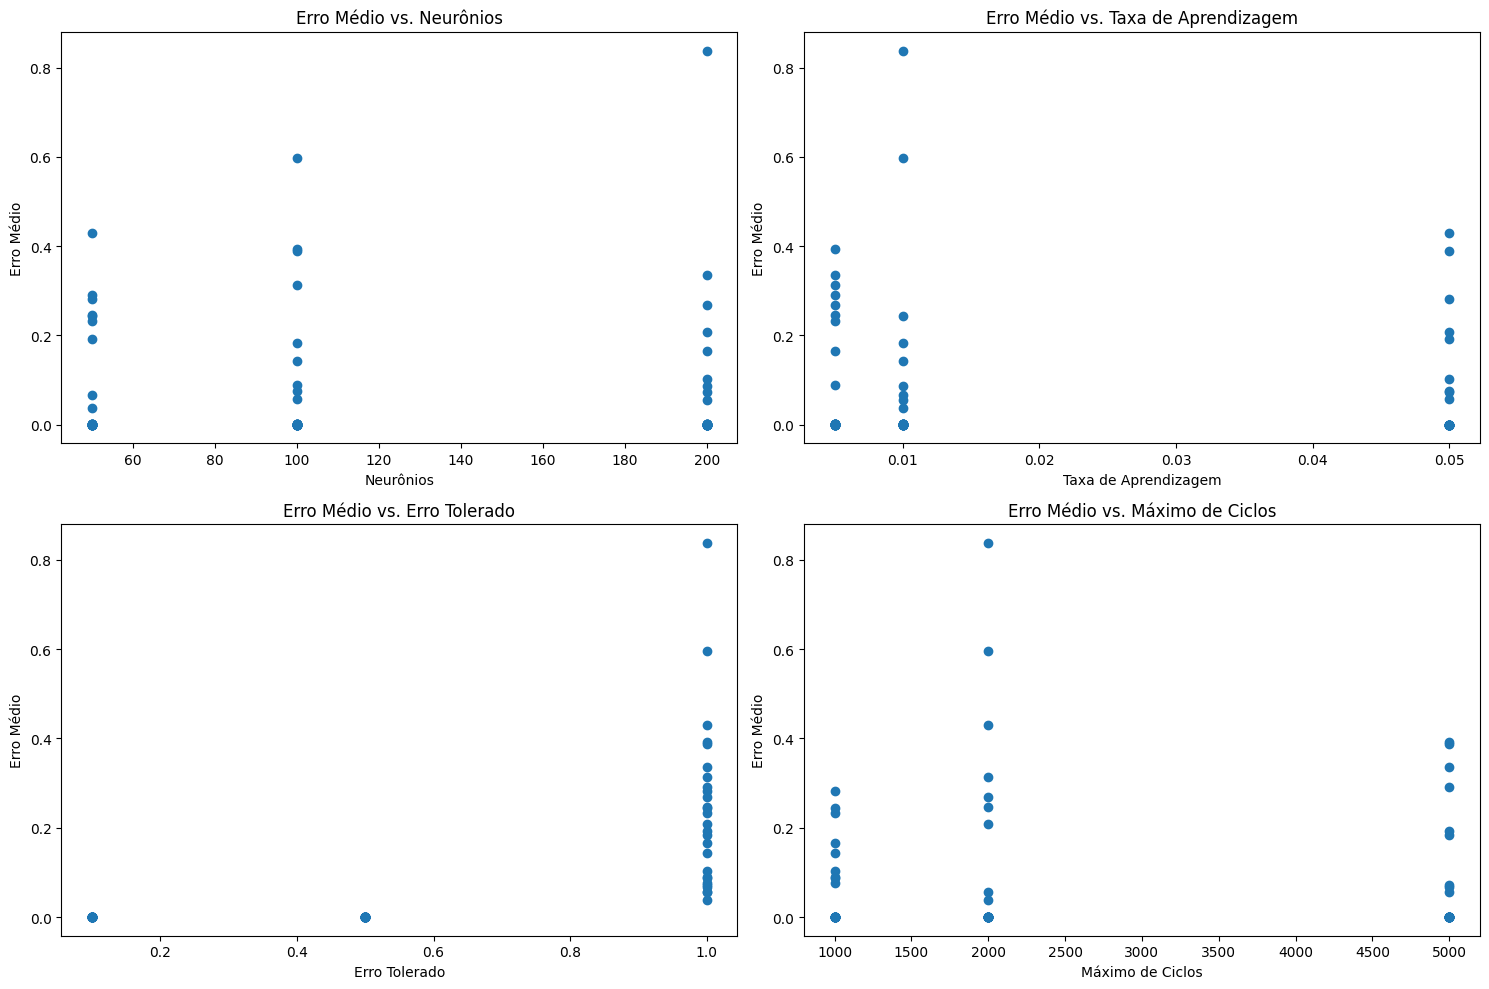

In [37]:
plotar_variaveis(df_resultados)


In [40]:

plotar_variaveis(df_resultados)


In [41]:
df_resultados_ordenado = df_resultados.sort_values(by='Erro Médio')
display(df_resultados_ordenado)

,Neurônios,Taxa de Aprendizagem,Erro Tolerado,Máximo de Ciclos,Erro Médio
72,200,0.050,0.1,1000,0.000122
74,200,0.050,0.1,5000,0.000138
73,200,0.050,0.1,2000,0.000141
18,50,0.050,0.1,1000,0.000216
11,50,0.010,0.1,5000,0.000222
...,...,...,...,...,...
53,100,0.050,1.0,5000,0.388562
35,100,0.005,1.0,5000,0.392802
25,50,0.050,1.0,2000,0.429072
43,100,0.010,1.0,2000,0.596455


In [42]:
correlacao = df_resultados.corr()['Erro Médio'].drop('Erro Médio')

# Ordena os valores de correlação em ordem decrescente
correlacao_ordenada = correlacao.abs().sort_values(ascending=False)

display(correlacao_ordenada)

Erro Tolerado           0.657562
Taxa de Aprendizagem    0.057062
Máximo de Ciclos        0.012153
Neurônios               0.007622
Name: Erro Médio, dtype: float64

Conclui-se que o erro tolerado é a variável que mais impactou a acertividade do modelo